In [2]:
import numpy as np 
import pandas as pd
import pickle,os
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append("..")
from nets import Nets
from utils import *

import re

from sklearn.cluster import DBSCAN


from postprocessing import *
from analysis import *

%load_ext autoreload
%autoreload 2

In [3]:
exp_root = "/Users/daniellengyel/flat_sharp/flat_sharp/experiments/{}" #"/Users/daniellengyel/flat_sharp/gaussian/gaussian_experiments/Apr03_17-38-00_Daniels-MacBook-Pro-4.local"
# configs = get_configs(experiment_folder)

In [7]:
# get all sorts of data
exp_dict = {}

experiment_folder = exp_root.format("FashionMNIST/May14_23-57-49_Daniels-MacBook-Pro-4.local") #Apr27_00-03-27_Daniels-MacBook-Pro-4.local
exp_dict["stuff"] = get_stuff(experiment_folder)
exp_dict["models"] = get_all_models(experiment_folder, -1)
exp_dict["resampling_idxs"] = get_sample_idxs(experiment_folder)

1589493492.032958
1589493495.577718
1589493496.728854
1589493491.596385
1589493487.594653
1589493489.227028
1589493493.217603
1589493494.16941
1589493490.256905
1589493487.561665
1589493492.032958
1589493495.577718
1589493496.728854
1589493491.596385
1589493487.594653
1589493489.227028
1589493493.217603
1589493494.16941
1589493490.256905
1589493487.561665


In [9]:
stats_df = get_end_stats(exp_dict["stuff"])
stats_df.sort_values(by="Mean Test Acc", ascending=False)


KeyError: 'num_nets'

In [19]:
import itertools

def _get_plot_values(exp_dict, X_axis, Y_axis, filter_dict={}):
    stat_names = ["Mean Std Trace", "Mean Test Acc", "Mean Trace", "Mean Train Loss", "Test Acc/Trace Correlation", "Train Loss/Trace Correlation"]
    key_label_names = []
    
    if X_axis not in stat_names:
        key_label_names.append(X_axis)
    if Y_axis not in stat_names:
        key_label_names.append(Y_axis)

    stats_df = get_end_stats(exp_dict["stuff"], key_label_names, filter_dict)
    
    X_values = []
    Y_values = []
    
    for idx, row in stats_df.iterrows():
        if X_axis not in stat_names:
            X_values.append(float(idx[0]))
        else:
            X_values.append(float(row[X_axis]))
        if Y_axis not in stat_names:
            Y_values.append(float(idx[-1]))
        else:
            Y_values.append(float(row[Y_axis]))
    return X_values, Y_values

def plot_end_stats(exp_dict, X_axis, Y_axis, filter_dict={}, X_axis_bounds=None, Y_axis_bounds=None):
    
    plots = []
    plots_names = []
    
    # get template filter_dict which does not neeed to be iterated
    # get keys which do need to be iterated 
    template_filter_dict = {}
    grid_search_keys = []
    grid_search_values = []
    for k in filter_dict:
        k_split = k.split(":")
        if k_split[-1] == "special":
            grid_search_keys.append(k_split[0])
            grid_search_values.append(filter_dict[k])
        else:
            template_filter_dict[k] = filter_dict[k]
            
    # do grid search over the ones which do need to be iterated
    if len(grid_search_keys) != 0:
        for c in itertools.product(*grid_search_values):
            curr_plt_name = []
            for i in range(len(grid_search_keys)):
                template_filter_dict[grid_search_keys[i]] = c[i]
                curr_plt_name.append("{}:{} ".format(grid_search_keys[i], c[i]))

            X_values, Y_values = _get_plot_values(exp_dict, X_axis, Y_axis, filter_dict=template_filter_dict)
            plots.append(plt.scatter(X_values, Y_values))
            plots_names.append("".join(curr_plt_name)[:-1])
    else:
        X_values, Y_values = _get_plot_values(exp_dict, X_axis, Y_axis, filter_dict=template_filter_dict)
        plots.append(plt.scatter(X_values, Y_values))
        plots_names.append("")
        
    
    
    plt.legend(tuple(plots),
       plots_names,
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)
    
    plt.xlabel(X_axis)
    plt.ylabel(Y_axis)
    if X_axis_bounds is not None:
        plt.xlim(X_axis_bounds) 
    if Y_axis_bounds is not None:
        plt.ylim(Y_axis_bounds)    
    
    plt.show()

    
    


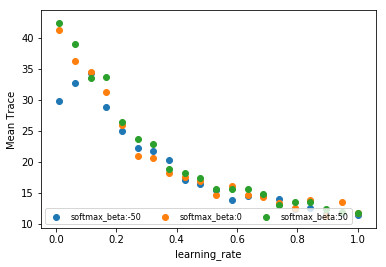

In [23]:
plot_end_stats(exp_dict, X_axis="learning_rate", Y_axis="Mean Trace", filter_dict={"softmax_beta:special": [-50, 0, 50]}, Y_axis_bounds=None)


1587969731.521131
No Potential/curr for step 25001


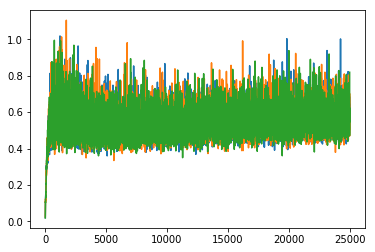

1587959691.3295202
No Potential/curr for step 25001


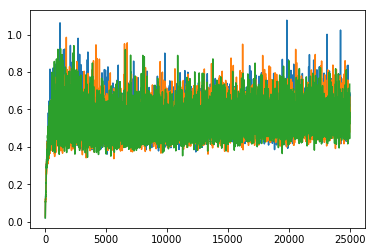

1587959771.2839198
No Potential/curr for step 25001


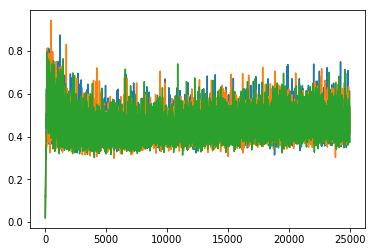

1587938682.237956
No Potential/curr for step 25001


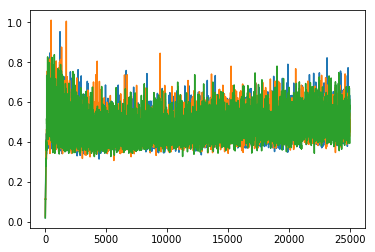

1587979969.839093
No Potential/curr for step 25001


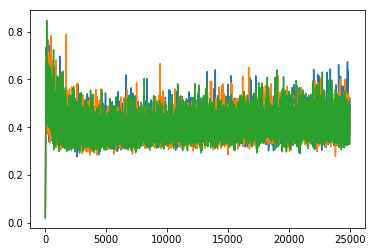

1587949916.310493
No Potential/curr for step 25001


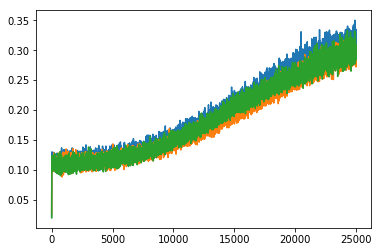

1587979978.0448792
No Potential/curr for step 25001


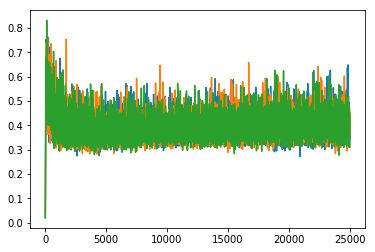

1587979863.996534
No Potential/curr for step 25001


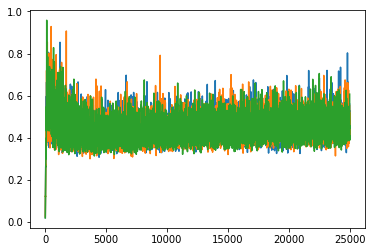

1587979752.008478
No Potential/curr for step 25001


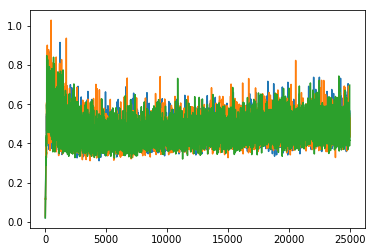

1587949901.417682
No Potential/curr for step 25001


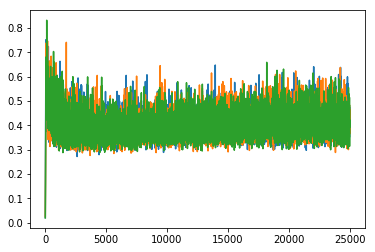

1587979875.9594638
No Potential/curr for step 25001


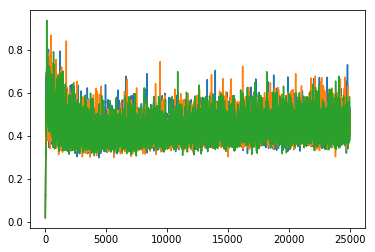

1587979762.577444
No Potential/curr for step 25001


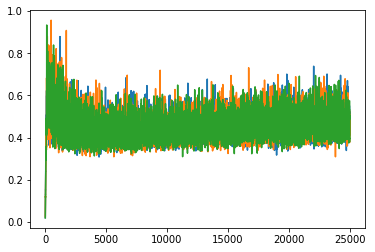

1587959680.130168
No Potential/curr for step 25001


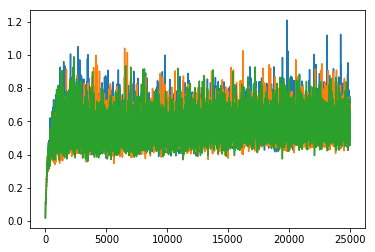

1587938676.958861
No Potential/curr for step 25001


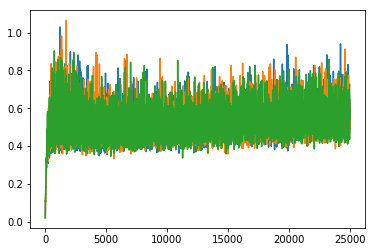

1587949851.291446
No Potential/curr for step 25001


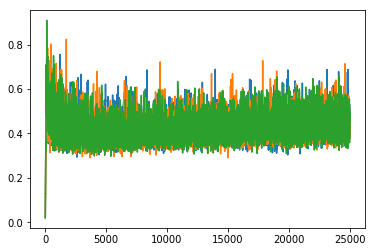

1587949952.543494
No Potential/curr for step 25001


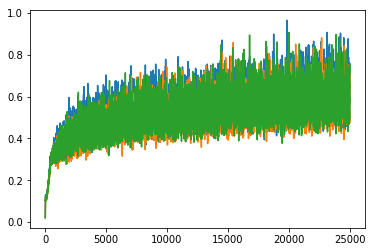

1587938668.618131
No Potential/curr for step 25001


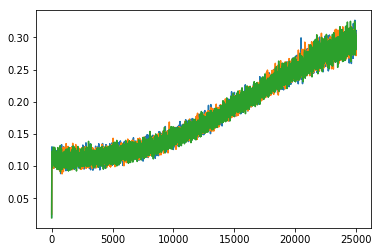

1587959718.445655
No Potential/curr for step 25001


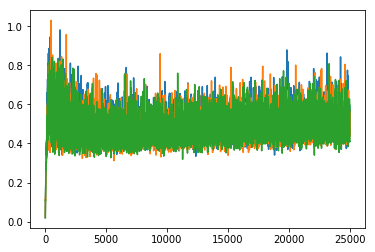

1587979679.813218
No Potential/curr for step 25001


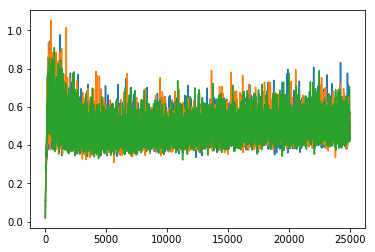

1587969642.196658
No Potential/curr for step 25001


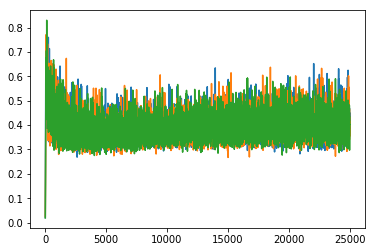

1587969665.7071118
No Potential/curr for step 25001


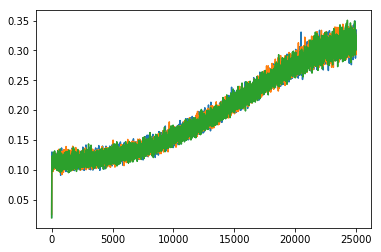

1587949851.510209
No Potential/curr for step 25001


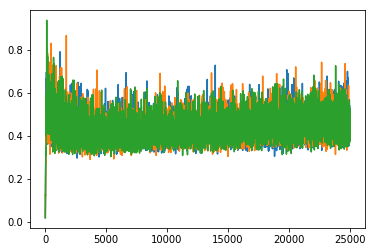

1587979950.331296
No Potential/curr for step 25001


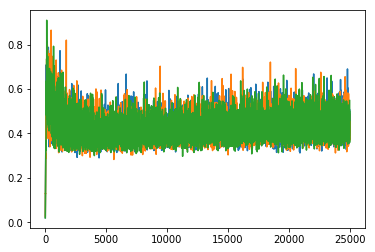

1587949904.895765
No Potential/curr for step 25001


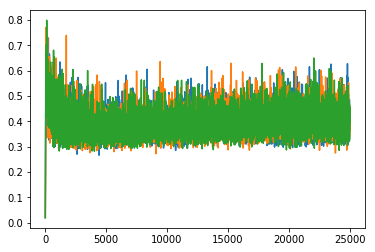

1587938675.3940868
No Potential/curr for step 25001


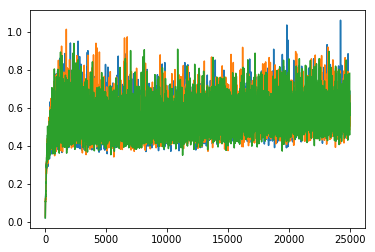

1587959776.781079
No Potential/curr for step 25001


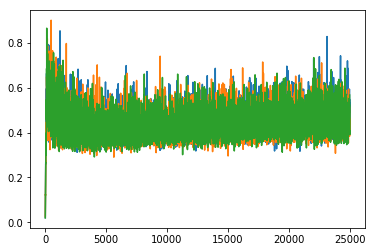

1587980060.502008
No Potential/curr for step 25001


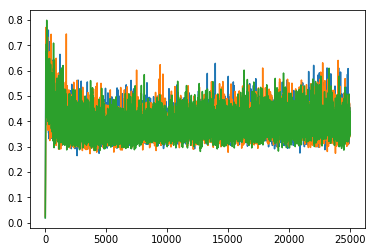

1587959724.059208
No Potential/curr for step 25001


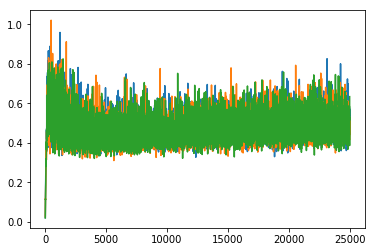

1587959802.4893582
No Potential/curr for step 25001


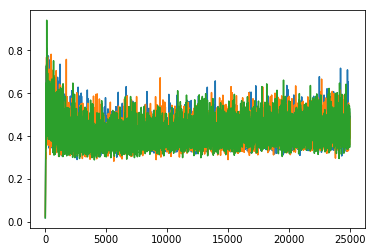

1587938678.520759
No Potential/curr for step 25001


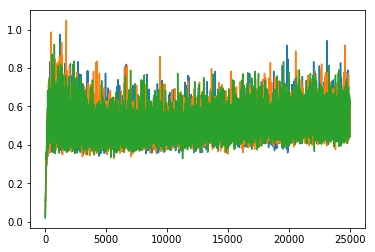

1587969614.3948228
No Potential/curr for step 25001


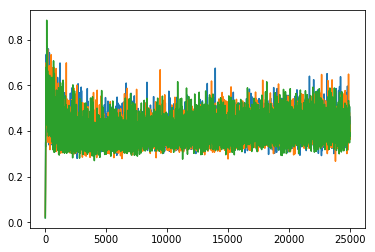

1587950011.623552
No Potential/curr for step 25001


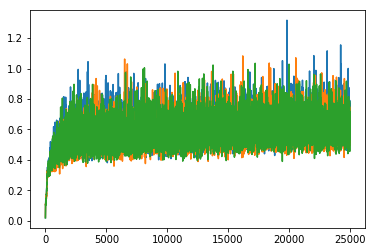

1587949897.7914429
No Potential/curr for step 25001


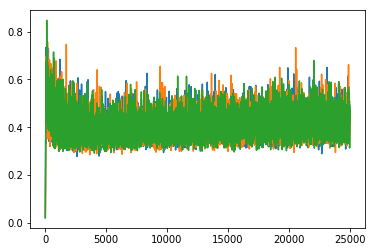

1587949874.0319622
No Potential/curr for step 25001


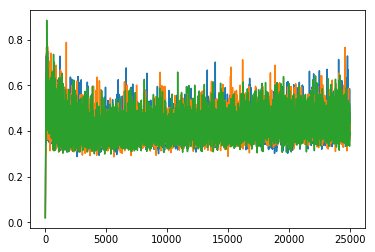

1587979966.486805
No Potential/curr for step 25001


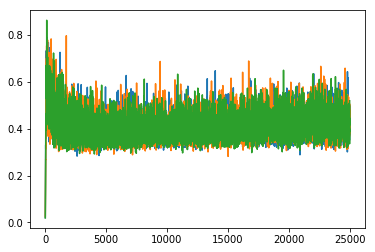

1587959691.356412
No Potential/curr for step 25001


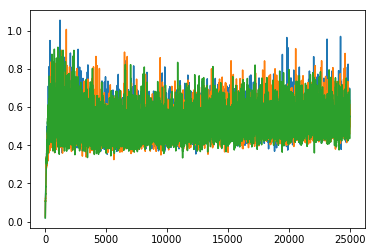

1587938674.130773
No Potential/curr for step 25001


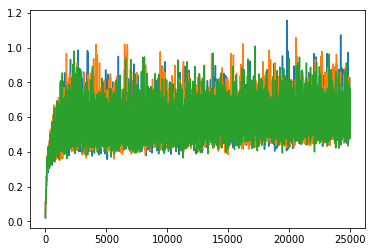

1587938684.189412
No Potential/curr for step 25001


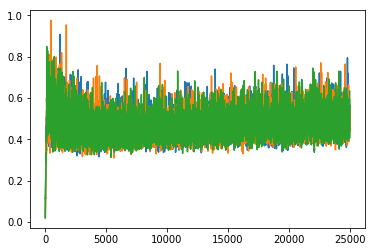

1587938670.7361999
No Potential/curr for step 25001


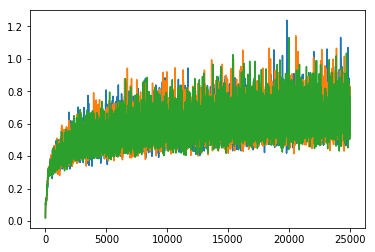

1587949881.584672
No Potential/curr for step 25001


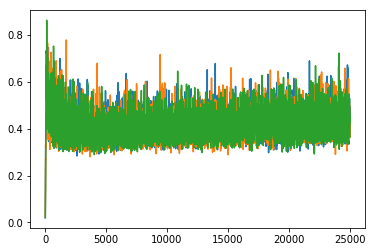

1587969718.0564501
No Potential/curr for step 25001


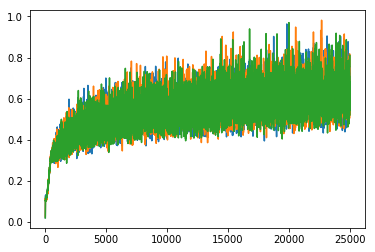

1587959717.2117991
No Potential/curr for step 25001


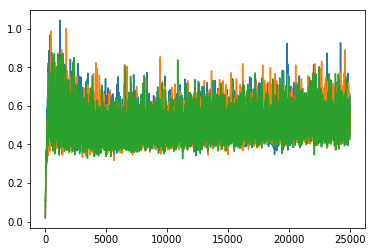

1587969637.918807
No Potential/curr for step 25001


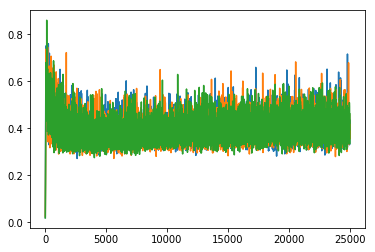

1587969725.9068859
No Potential/curr for step 25001


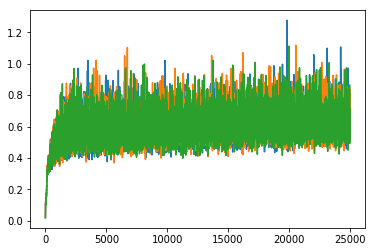

1587969555.326112
No Potential/curr for step 25001


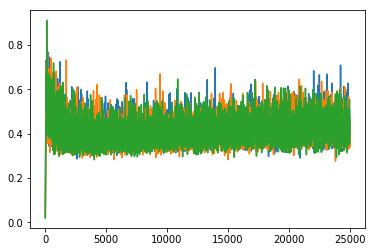

1587979959.526977
No Potential/curr for step 25001


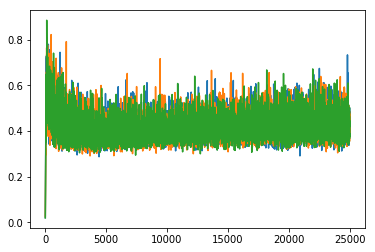

1587938669.357399
No Potential/curr for step 25001


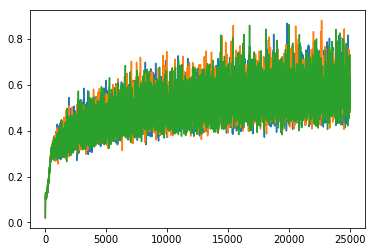

1587938680.006163
No Potential/curr for step 25001


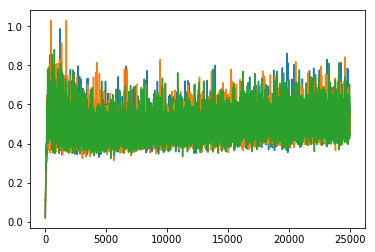

1587969760.3500469
No Potential/curr for step 25001


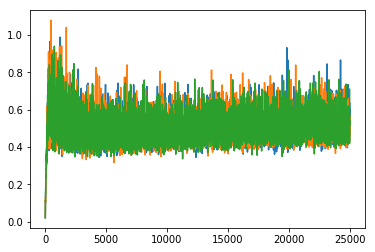

1587949838.352247
No Potential/curr for step 25001


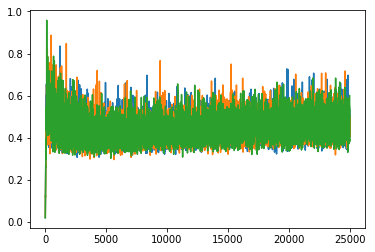

1587969725.874828
No Potential/curr for step 25001


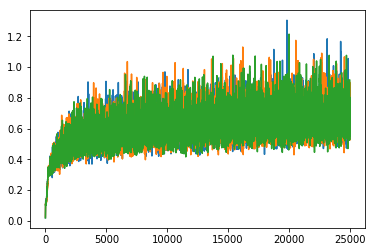

1587959769.9323468
No Potential/curr for step 25001


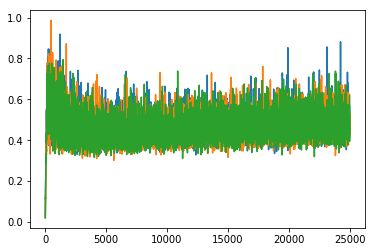

1587938685.4067688
No Potential/curr for step 25001


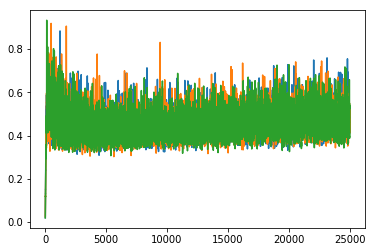

1587938672.734766
No Potential/curr for step 25001


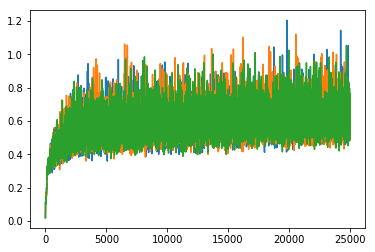

1587959802.4950268
No Potential/curr for step 25001


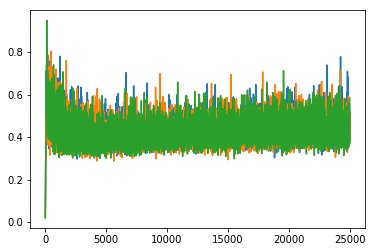

1587969735.687742
No Potential/curr for step 25001


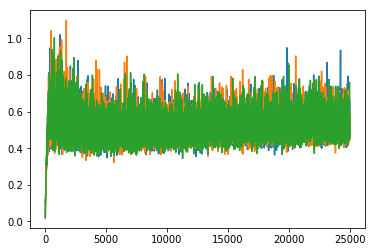

1587969726.714976
No Potential/curr for step 25001


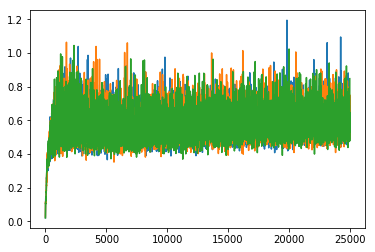

1587959778.332762
No Potential/curr for step 25001


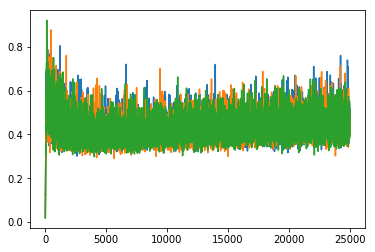

1587949956.446914
No Potential/curr for step 25001


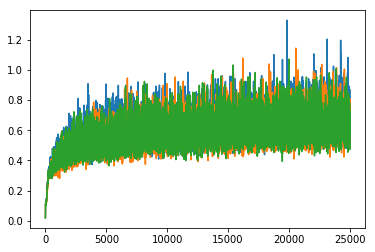

1587979708.3244438
No Potential/curr for step 25001


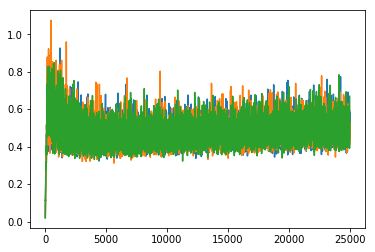

NameError: name 'tmp_list' is not defined

In [6]:

def get_runs_plots(exp_dict, var_name="Kish", running_average_gamma=0.2):
    exp_runs = exp_dict["stuff"]["runs"]
    for i in exp_runs:
        
        plot_list = [0]

        print(i)

        for step in sorted(exp_runs[i], key=lambda x: int(x)):
            try:
                # going down the tree with node names given by var_name.split("/")
                curr_dict = exp_runs[i][step]
                var_name_split = var_name.split("/")
                for n in var_name_split:
                    curr_dict = curr_dict[n]
                    
                if "net" in curr_dict:
                    num_nets = int(max(curr_dict["net"], key=lambda x: int(x))) + 1 # +1 bc zero indexed
                    to_append = np.array([curr_dict["net"][str(nn)] for nn in range(num_nets)])
                    
                else:
                    to_append = curr_dict[""]
                to_append = plot_list[-1]*(1 - running_average_gamma) + running_average_gamma*to_append
                plot_list.append(to_append)
            except:
                print("No {} for step {}".format(var_name, step))
        plt.plot(plot_list[1:])
        plt.show()
            
    return tmp_list

# kish = get_runs_plot(stuff["runs"], ["Kish"])
# weight_var_trace = get_runs_plot(stuff["runs"], ["WeightVarTrace"])

weight_var_trace = get_runs_plots(exp_dict, "Potential/curr")



In [ ]:
plt.plot(kish)
plt.show()

plt.plot(weight_var_trace)
plt.show()

In [242]:

def plot_analysis(exp_dict, X_axis, Y_axis):

    marker_list = ["o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]



    stuff = exp_dict["stuff"]
    run_data = stuff["runs"]
    trace = stuff["trace"]
    
    
    for exp_id in stuff["configs"]:
        plots = []
        plots_names = []
                
        num_nets = stuff["configs"][exp_id]["num_nets"]
        num_steps = max(run_data[exp_id], key=lambda x: int(x))

        beta = stuff["configs"][exp_id]["softmax_beta"]

        print(beta)

        models = exp_dict["models"][exp_id] #CIFAR10_models
        models_vecs = np.array([get_params_vec(models[str(nn)]).detach().numpy() for nn in range(num_nets)])
        
        clustering = DBSCAN(eps=5, min_samples=2).fit(models_vecs)
        l = clustering.labels_



#         Y = [run_data[i][4999]["Potential"]["total"]["net"][str(nn)] for nn in range(50)]
    #     Y = [eigs[i][str(nn)][0][0] for nn in range(50)]
        Y = np.array([np.mean(trace[exp_id][str(nn)]) for nn in range(num_nets)])

#         X = np.array([run_data[id_exp][4999]["Loss"]["train"]["net"][str(nn)] for nn in range(50)])
        X = np.array([run_data[exp_id][num_steps]["Accuracy"]["net"][str(nn)] for nn in range(num_nets)])

#         last_sampling_step = sorted(two_resampling_idx[id_exp], key=lambda x: int(x))[-2]
#         last_resamples = two_resampling_idx[id_exp][last_sampling_step]
#         res_idx_to_marker = {res_idx: marker_list[i] for i, res_idx in enumerate(set(last_resamples))}

        label_set = set(l)
#         for l in range(50):
#             plots_names.append(l[nn])
#             plots.append(plt.scatter(X[nn], Y[nn], marker="o"))#res_idx_to_marker[last_resamples[nn]])
        for label in label_set:
            plots_names.append(label)
            plots.append(plt.scatter(X[l == label], Y[l == label], marker="o"))#res_idx_to_marker[last_resamples[nn]])


        plt.legend(tuple(plots),
               plots_names,
               scatterpoints=1,
               loc='lower left',
               ncol=3,
               fontsize=8)



        plt.xlabel("loss")
        plt.ylabel("trace")

        plt.show()

50


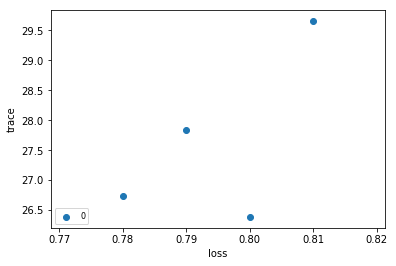

-50


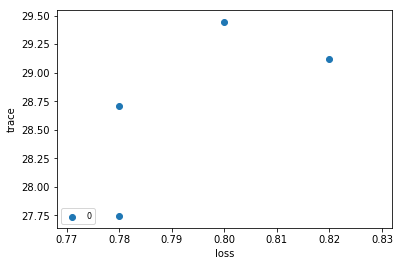

0


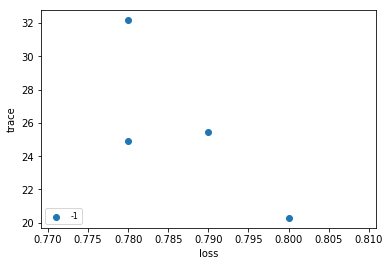

In [243]:
plot_analysis(exp_dict)

some analysis of final distance... 

show low loss path between. distance. what else?

# Analysis 

Plots (FUNCTION):
ACC vs Trace
Train Loss vs Trace
ACC vs Train loss
Mean/COV ACC -- MEAN/COV TRACE -- MEAN/COV TRAIN LOSS (CORRELATIONS FOR ALL OF THESE)


Plot weightspace and input space 

In [124]:
plots_names = []
plots = []

for r_data in [CIFAR10_stuff]:
    for i in r_data:
        
        try:
            beta = configs[i]["softmax_beta"]
        except:
            beta = 0
        plots_names.append(str(beta))
               
        run_data = r_data[0]
        trace = r_data[1]

        Y = [run_data[i][4999]["Potential"]["total"]["net"][str(nn)] for nn in range(50)]
    #     Y = [eigs[i][str(nn)][0][0] for nn in range(50)]
        Y = [np.mean(trace[i][str(nn)]) for nn in range(50)]

        X = [run_data[i][4999]["Loss"]["train"]["net"][str(nn)] for nn in range(50)]
#         X = [run_data[i][5000]["Accuracy"]["net"][str(nn)] for nn in range(50)]

        plots.append(plt.scatter(np.array(X), np.array(Y)))

        
plt.legend(tuple(plots),
       plots_names,
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)



plt.xlabel("loss")
plt.ylabel("trace")

plt.show()



KeyError: 0

(array([7., 3., 6., 5., 4., 6., 2., 1., 1., 1.]),
 array([ 89.99026489,  98.92023621, 107.85020752, 116.78017883,
        125.71015015, 134.64012146, 143.57009277, 152.50006409,
        161.4300354 , 170.36000671, 179.28997803]),
 <a list of 10 Patch objects>)

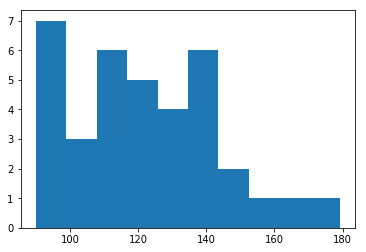

In [77]:
a = [127.37311553955078, 97.93885803222656, 158.1538848876953, 132.8297119140625, 116.41229248046875, 112.09640502929688, 131.17662048339844, 140.27606201171875, 104.38414764404297, 155.23452758789062, 136.9343719482422, 130.11436462402344, 121.89076232910156, 97.82975006103516, 121.72054290771484, 104.34451293945312, 169.51600646972656, 91.82275390625, 134.81613159179688, 136.09010314941406, 98.46024322509766, 121.43125915527344, 88.79573059082031, 118.9525146484375, 106.84197998046875, 93.86476135253906, 166.26219177246094, 111.35343170166016, 133.33021545410156, 107.85846710205078, 111.2021255493164, 125.52880859375]
a = [148.1651153564453, 89.99545288085938, 143.13145446777344, 129.59164428710938, 133.98138427734375, 179.28997802734375, 139.3506317138672, 90.68531036376953, 107.76986694335938, 121.02605438232422, 135.69696044921875, 101.74652099609375, 115.87667083740234, 122.7598648071289, 92.99028015136719, 165.59707641601562, 118.77754211425781, 90.56055450439453, 116.37315368652344, 113.5857162475586, 89.99026489257812, 136.0908203125, 90.26911163330078, 147.79518127441406, 137.81057739257812, 156.77203369140625, 118.10494232177734, 98.78507995605469, 133.88307189941406, 110.46347045898438, 113.26660919189453, 140.4408721923828, 99.68799591064453, 126.61418151855469, 113.37327575683594, 119.75435638427734]
plt.hist(a)

(50,)
[542.9575805664062, 600.6249389648438, 534.30419921875, 553.8997802734375, 542.3204345703125, 695.7343139648438, 568.3363037109375, 559.5490112304688, 621.9464721679688, 564.6443481445312, 519.8447265625, 521.8214721679688, 515.1004638671875, 609.952392578125, 537.172607421875, 616.8250732421875, 509.0643310546875, 635.6880493164062, 471.21484375, 577.85107421875, 549.3336791992188, 599.1685180664062, 587.0655517578125, 695.5125732421875, 562.3419189453125]

(-50,)
[468.0771179199219, 457.67218017578125, 510.1174011230469, 474.34967041015625, 574.97021484375, 486.2344665527344, 606.5770874023438, 497.95318603515625, 487.2482604980469, 620.97802734375, 531.549560546875, 475.3292236328125, 438.49078369140625, 439.6686706542969, 546.5634765625, 573.0172119140625, 548.7708740234375, 514.002685546875]



,Mean Std Trace,Mean Test Acc,Mean Trace,Mean Train Loss,Test Acc/Trace Correlation,Train Loss/Trace Correlation
50,54.889864,0.5996,581.138967,0.869805,0.173417,-0.026742
-50,56.388127,0.6072,527.883488,0.925043,0.138459,-0.366431


In [175]:
# next step, get accuracy here... sucks we can't get it otherwise

In [171]:
configs = get_configs(experiment_folder)
config_to_id_map = get_config_to_id_map(configs)
ids = get_ids(config_to_id_map, config)

NameError: name 'config' is not defined

In [161]:
config = {'batch_test_size': 100,
 'batch_train_size': 16,
 'ess_threshold': None,
 'learning_rate': 0.001,
 'momentum': 0,
 'net_name': 'SimpleNet',
 'net_params': None, #[2, 2, 256, 1],
 'num_steps': 100,
 'num_nets': 100,
 'softmax_beta': None, #0,
 'torch_random_seed': 1,
 'sampling_tau': None,
 'weight_type': 'loss_gradient_weights'}

In [ ]:
import time

In [ ]:
for i in sorted(tsne_dict):
    print(i)
    plt.scatter(tsne_dict[i][:, 0], tsne_dict[i][:, 1])
    plt.show()
    

In [ ]:
tsne_dict = get_tsne_dict(experiment_folder, curr_dir)
for i in sorted(tsne_dict):
    print(i)
    plt.scatter(tsne_dict[i][:, 0], tsne_dict[i][:, 1])
    plt.show()

In [ ]:


models, sampled_idx = get_models(os.path.join(experiment_folder, "resampling", curr_dir), 0)
models_vecs = np.array([get_params_vec(m) for m in models.values()])

shortest_distance = float("inf")
shortest_pair = (None, None)

largest_distance = -float("inf")
largest_pair = (None, None)
for i in range(len(models_vecs)):
    for j in range(i + 1, len(models_vecs)):
        if np.linalg.norm(models_vecs[i] - models_vecs[j]) < shortest_distance:
            shortest_distance = np.linalg.norm(models_vecs[i] - models_vecs[j])
            shortest_pair = (i, j)
        if np.linalg.norm(models_vecs[i] - models_vecs[j]) > largest_distance:
            largest_distance = np.linalg.norm(models_vecs[i] - models_vecs[j])
            largest_pair = (i, j)


In [ ]:
shortest_distance

In [ ]:
largest_distance
np.linalg.norm(models_vecs[0])

In [ ]:
with open(os.path.join(experiment_folder, "data.pkl"), "rb") as f:
    data = pickle.load(f)

train_loader = DataLoader(data[0], batch_size=len(data[0]), shuffle=True)  # fix the batch size
test_loader = DataLoader(data[1], batch_size=len(data[1]))

largest_arr = []
largest_acc = []
shortest_arr = []
shortest_acc = []

largest_mags = []
shortest_mags = []

step_dir = get_all_model_steps(os.path.join(experiment_folder, "resampling", curr_dir))
for step in sorted(step_dir):
    print(step)
    models, sampled_idx = get_models(os.path.join(experiment_folder, "resampling", curr_dir), step)
    models_vecs = np.array([get_params_vec(m) for m in models.values()])
    
    largest_arr.append(np.linalg.norm(models_vecs[largest_pair[0]] - models_vecs[largest_pair[1]]))
    shortest_arr.append(np.linalg.norm(models_vecs[shortest_pair[0]] - models_vecs[shortest_pair[1]]))
    
    largest_acc.append([get_net_accuracy(models[str(largest_pair[0])], test_loader), get_net_accuracy(models[str(largest_pair[1])], test_loader)])
    shortest_acc.append([get_net_accuracy(models[str(shortest_pair[0])], test_loader), get_net_accuracy(models[str(shortest_pair[1])], test_loader)])


    largest_mags.append([np.linalg.norm(models_vecs[largest_pair[0]]), np.linalg.norm(models_vecs[largest_pair[1]])])
    shortest_mags.append([np.linalg.norm(models_vecs[shortest_pair[0]]),np.linalg.norm(models_vecs[shortest_pair[1]])])

In [ ]:
plt.plot(list(sorted(step_dir)), largest_arr )
plt.show()
plt.plot(list(sorted(step_dir)), np.array(largest_acc)[:, 0])
plt.plot(list(sorted(step_dir)), np.array(largest_acc)[:, 1])
plt.show()

plt.plot(list(sorted(step_dir)), np.array(shortest_acc)[:, 0])
plt.plot(list(sorted(step_dir)), np.array(shortest_acc)[:, 1])
plt.show()


plt.plot(list(sorted(step_dir)), np.array(largest_mags)[:, 0])
plt.plot(list(sorted(step_dir)), np.array(largest_mags)[:, 1])
plt.show()

plt.plot(list(sorted(step_dir)), np.array(shortest_mags)[:, 0])
plt.plot(list(sorted(step_dir)), np.array(shortest_mags)[:, 1])
plt.show()

In [90]:


all_dist = {}
for i in range(len(models)):
    for j in range(i+1, len(models)):
        a = get_params_vec(models[str(i)])
        b = get_params_vec(models[str(j)])

        all_dist[(i, j)] = torch.norm(a - b)

In [91]:
all_dist

{(0, 1): tensor(16.6315, grad_fn=<NormBackward0>),
 (0, 2): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 3): tensor(0.0025, grad_fn=<NormBackward0>),
 (0, 4): tensor(16.6317, grad_fn=<NormBackward0>),
 (0, 5): tensor(0.0025, grad_fn=<NormBackward0>),
 (0, 6): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 7): tensor(0.0040, grad_fn=<NormBackward0>),
 (0, 8): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 9): tensor(0.0032, grad_fn=<NormBackward0>),
 (0, 10): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 11): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 12): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 13): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 14): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 15): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 16): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 17): tensor(16.6316, grad_fn=<NormBackward0>),
 (0, 18): tensor(0.0022, grad_fn=<NormBackward0>),
 (0, 19): tensor(16.6315, grad_fn=<NormBackward0>),
 (0, 20): tensor(0.0025, g

In [94]:
models_vecs = np.array([get_params_vec(m).detach().numpy() for m in models.values()])

X_embedded = TSNE(n_components=2).fit_transform(models_vecs)

[]

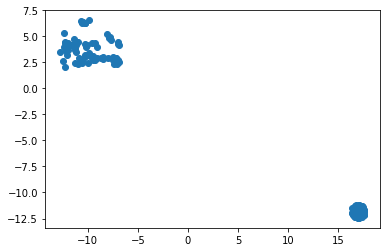

In [96]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.plot()

In [109]:
m = models[str(0)]
grad_steps= []
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)  # fix the batch size

for data in train_loader:
    inputs, labels = data
    # Compute gradients for input.
    inputs.requires_grad = True

    # forward + backward + optimize
    outputs = m(inputs)
    loss = criterion(outputs.float(), labels)
    loss.backward(retain_graph=True)
    
    grad_steps.append(get_grad_params_vec(m).detach().numpy())

In [110]:
u, s, vh = np.linalg.svd(np.array(grad_steps), full_matrices=False)

array([7.4566307e+01, 4.2778692e+00, 3.0374603e+00, 9.4402808e-01,
       3.5643500e-01, 2.0473388e-01, 1.5873392e-01, 1.1142698e-01,
       9.3603715e-02, 7.8027248e-02, 6.5044165e-02, 6.0796760e-02,
       4.8285898e-02, 3.8336921e-02, 3.6647409e-02, 3.3087600e-02,
       2.9207643e-02, 2.3398781e-02, 2.1899553e-02, 2.1008376e-02,
       1.7819939e-02, 1.6101249e-02, 1.4436195e-02, 1.2744365e-02,
       1.1394381e-02, 1.0279431e-02, 9.7109778e-03, 9.3411161e-03,
       8.4276162e-03, 8.1074052e-03, 7.4696536e-03, 6.8786601e-03],
      dtype=float32)

In [ ]:
mnist_data = get_